<a href="https://colab.research.google.com/github/Usamah-Abdullateef/Air-Pollution_-Data-Analysis/blob/main/Data_Analysis_test_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!ls "/content/drive/MyDrive/"


'1 Application for Accommodation.docx'
 4BAF0ADA-F8D5-4D51-A95C-E6E95C65DAB5.jpeg
 5AA12335-592D-44CC-9189-6B376A411169.jpeg
 Academic_tutor_Cover_Letter.gdoc
'Account Access Request Form.docx'
'Account Access Request Form.gdoc'
'AI_ Certificate.gdoc'
'AlgocellsMedical Form (2).gdoc'
'AlgocellsMedical Form (2).pdf'
'Assessment Data-20250512'
'AUDIT OF BUSLA WEBSITES.docx'
'BRP_card_front (1).jpg'
 BRP_card_front.jpg
'Business letter (1).gdoc'
'Business letter.gdoc'
 C09F822F-DDA5-426F-8346-A67322CF26F0.jpeg
 chinadatasets
'Coders Creed (2).pptx'
'Colab Notebooks'
'Copy of 10 Competitive Analysis Templates – HubSpot .gsheet'
'Copy of 1 Application for Accommodation.docx'
'Cover Letter_Acculink_Technology.gdoc'
'djx-ibuu-yzf – 27 Nov 2023.gjam'
'djx-ibuu-yzf – 27 Nov 2023.pdf'
'Getting started.pdf'
'grf-syxc-pjg – 27 May 2024.gjam'
'grf-syxc-pjg – 27 May 2024.pdf'
'Letter (1).gdoc'
 Letter.gdoc
'Personal_Statement_PhD_in Stiffness-Adjustable Robotic Systems for On-Wing Aero-Engine Repair

In [5]:
#Aotizhongxin is urban
#Changping is Suburban/Rural
#Gucheng is Surburban
#Shunyi is Suburban/Industrial
#Nongzhanguan is Urban
%cd "/content/drive/MyDrive/chinadatasets"

/content/drive/MyDrive/chinadatasets


In [6]:
%ls

combined_output.csv
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv


In [7]:
import pandas as pd
import glob

In [8]:
# Get all CSV files in the folder
csv_files = glob.glob("/content/drive/MyDrive/chinadatasets/*.csv")

# Read and combine all CSV files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save to a new CSV file
combined_df.to_csv("combined_output.csv", index=False)

print("All CSV files have been merged into 'combined_output.csv'.")

All CSV files have been merged into 'combined_output.csv'.


In [9]:
df = pd.read_csv('combined_output.csv')
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [10]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
350635,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
350636,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
350637,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
350638,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
350639,35064,2017,2,28,23,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


In [11]:
df.shape

(350640, 18)

In [12]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       350640 non-null  int64  
 1   year     350640 non-null  int64  
 2   month    350640 non-null  int64  
 3   day      350640 non-null  int64  
 4   hour     350640 non-null  int64  
 5   PM2.5    342868 non-null  float64
 6   PM10     345302 non-null  float64
 7   SO2      343016 non-null  float64
 8   NO2      341810 non-null  float64
 9   CO       334476 non-null  float64
 10  O3       340546 non-null  float64
 11  TEMP     350250 non-null  float64
 12  PRES     350258 non-null  float64
 13  DEWP     350244 non-null  float64
 14  RAIN     350270 non-null  float64
 15  wd       348758 non-null  object 
 16  WSPM     350326 non-null  float64
 17  station  350640 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 48.2+ MB


In [14]:
stations = df['station'].value_counts()
print(f'Total number of stations in the dataset : {len(stations)}')
stations

Total number of stations in the dataset : 5


,count
station,
Changping,70128
Gucheng,70128
Shunyi,70128
Aotizhongxin,70128
Nongzhanguan,70128


In [18]:
# Missing Values
def missing_values_table(df):
      # Total missing values
         mis_val = df.isnull().sum()

      # Percentage of missing values
         mis_val_percent = 100 * df.isnull().sum() / len(df)

      # Make a table with the results
         mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
         print(mis_val_table)

        # Rename the columns
         mis_val_table_ren_columns = mis_val_table.rename(
         columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
         mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
         '% of Total Values', ascending=False)

        # Return the dataframe with missing information
         return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

             0         1
No           0  0.000000
year         0  0.000000
month        0  0.000000
day          0  0.000000
hour         0  0.000000
PM2.5     7772  2.216518
PM10      5338  1.522359
SO2       7624  2.174310
NO2       8830  2.518252
CO       16164  4.609856
O3       10094  2.878736
TEMP       390  0.111225
PRES       382  0.108944
DEWP       396  0.112936
RAIN       370  0.105521
wd        1882  0.536733
WSPM       314  0.089551
station      0  0.000000


,Missing Values,% of Total Values
CO,16164,4.609856
O3,10094,2.878736
NO2,8830,2.518252
PM2.5,7772,2.216518
SO2,7624,2.174310
PM10,5338,1.522359
wd,1882,0.536733
DEWP,396,0.112936
TEMP,390,0.111225
PRES,382,0.108944


In [19]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (350640, 18)

Data Types:
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

Missing Values:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       7772
PM10        5338
SO2         7624
NO2         8830
CO         16164
O3         10094
TEMP         390
PRES         382
DEWP         396
RAIN         370
wd          1882
WSPM         314
station        0
dtype: int64


In [20]:
if 'year' in df.columns and 'month' in df.columns and 'day' in df.columns and 'hour' in df.columns:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('datetime', inplace=True)

In [21]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
                   No           year          month            day  \
count  350640.000000  350640.000000  350640.000000  350640.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.119349       1.177198       3.448708       8.800105   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  350640.000000  342868.000000  345302.000000  343016.000000   
mean       11.500000      80.416110     106.274113      16.001821   
std         6.922196      81.232738      92.522018      21.915514   
min         0.000000       2.000000       2.000000       0.285600   
25%       

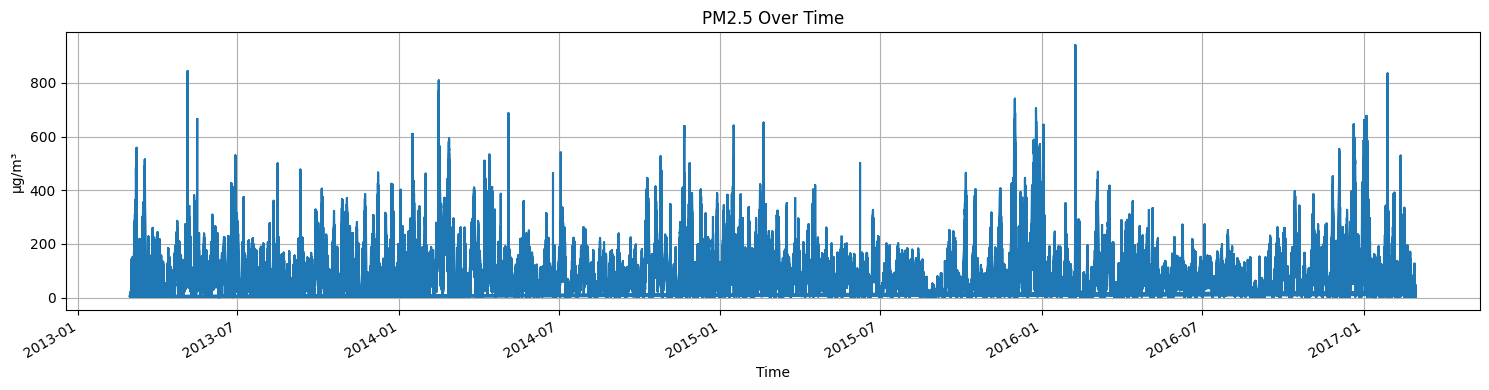

In [22]:
plt.figure(figsize=(15, 4))
df['PM2.5'].plot()
plt.title('PM2.5 Over Time')
plt.ylabel('µg/m³')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()

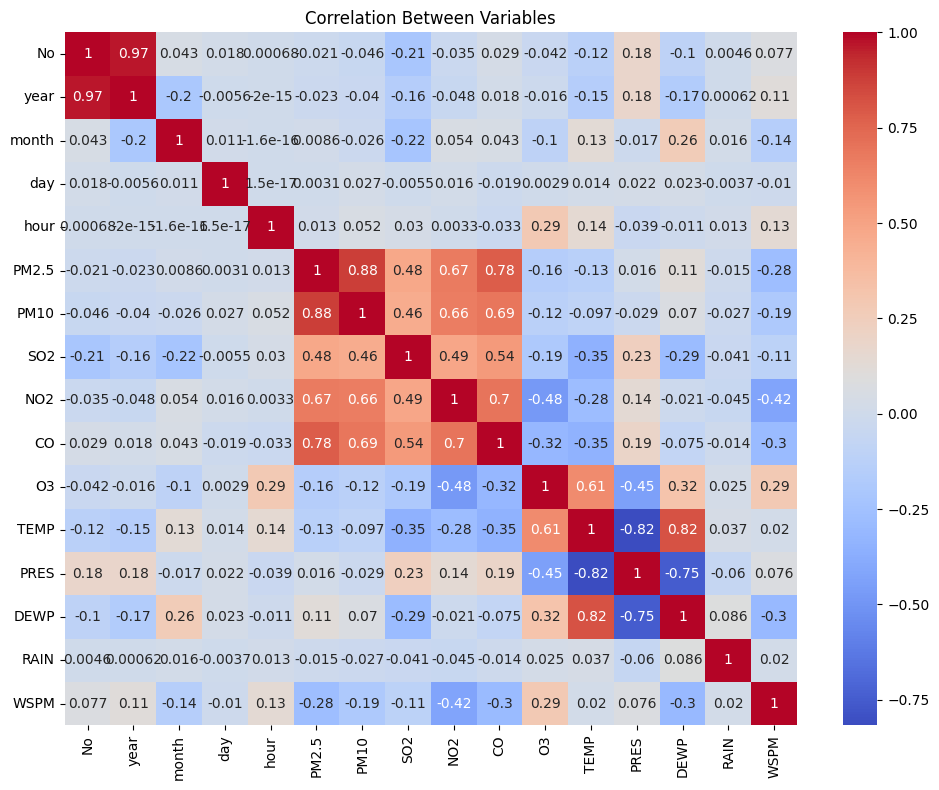

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.tight_layout()
plt.show()

<ipython-input-25-96c7050e5e5f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')


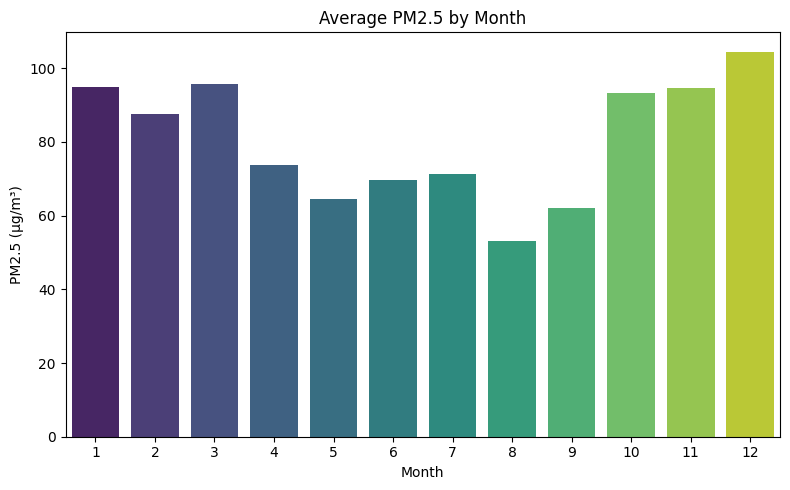

In [25]:
df['month'] = df.index.month
monthly_avg = df.groupby('month')['PM2.5'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title('Average PM2.5 by Month')
plt.xlabel('Month')
plt.ylabel('PM2.5 (µg/m³)')
plt.tight_layout()
plt.show()

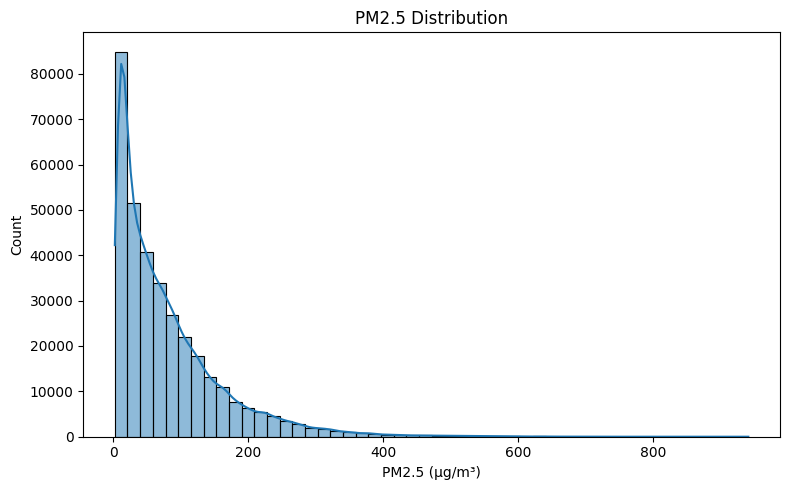

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['PM2.5'].dropna(), bins=50, kde=True)
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.tight_layout()
plt.show()


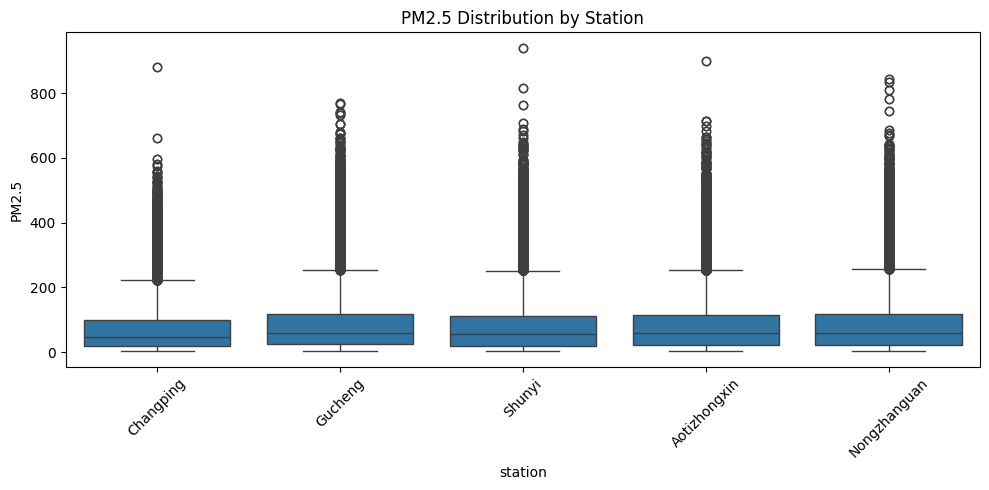

In [30]:
if 'station' in df.columns:
    # Reset the index before plotting
    df = df.reset_index()

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='station', y='PM2.5') # Changed 'stations' to 'station'
    plt.xticks(rotation=45)
    plt.title('PM2.5 Distribution by Station')
    plt.tight_layout()
    plt.show()